# US Baby Names Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
!ls data/names/

NationalReadMe.pdf yob1915.txt        yob1951.txt        yob1987.txt
yob1880.txt        yob1916.txt        yob1952.txt        yob1988.txt
yob1881.txt        yob1917.txt        yob1953.txt        yob1989.txt
yob1882.txt        yob1918.txt        yob1954.txt        yob1990.txt
yob1883.txt        yob1919.txt        yob1955.txt        yob1991.txt
yob1884.txt        yob1920.txt        yob1956.txt        yob1992.txt
yob1885.txt        yob1921.txt        yob1957.txt        yob1993.txt
yob1886.txt        yob1922.txt        yob1958.txt        yob1994.txt
yob1887.txt        yob1923.txt        yob1959.txt        yob1995.txt
yob1888.txt        yob1924.txt        yob1960.txt        yob1996.txt
yob1889.txt        yob1925.txt        yob1961.txt        yob1997.txt
yob1890.txt        yob1926.txt        yob1962.txt        yob1998.txt
yob1891.txt        yob1927.txt        yob1963.txt        yob1999.txt
yob1892.txt        yob1928.txt        yob1964.txt        yob2000.txt
yob1893.txt        yob1929.txt    

In [6]:
!head -n 10 data/names/yob2020.txt

Olivia,F,17535
Emma,F,15581
Ava,F,13084
Charlotte,F,13003
Sophia,F,12976
Amelia,F,12704
Isabella,F,12066
Mia,F,11157
Evelyn,F,9445
Harper,F,8778


In [7]:
names2020 = pd.read_csv("data/names/yob2020.txt", names=["name", "gender", "births"])

In [8]:
names2020.head()

,name,gender,births
0,Olivia,F,17535
1,Emma,F,15581
2,Ava,F,13084
3,Charlotte,F,13003
4,Sophia,F,12976


In [9]:
names2020.groupby('gender')['births'].sum()

gender
F    1598836
M    1706423
Name: births, dtype: int64

In [11]:
years = range(1880, 2021)

In [15]:
pieces = [] # list of dataframes
columns = ["name", "gender", "births"]
for year in years:
    path = f"data/names/yob{year}.txt"
    frame = pd.read_csv(path, names=columns)
    
    frame['year'] = year
    pieces.append(frame)

In [17]:
print(len(pieces))

141


In [18]:
names = pd.concat(pieces, ignore_index=True)

In [19]:
names.head()

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [20]:
names.tail()

,name,gender,births,year
2020858,Zykell,M,5,2020
2020859,Zylus,M,5,2020
2020860,Zymari,M,5,2020
2020861,Zyn,M,5,2020
2020862,Zyran,M,5,2020


In [21]:
total_births = names.pivot_table('births', index="year", columns="gender", aggfunc=sum)

In [22]:
total_births.tail()

gender,F,M
year,,
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527
2020,1598836,1706423


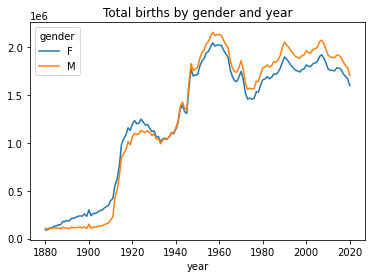

In [24]:
total_births.plot(title="Total births by gender and year");

In [26]:
def add_prop(group):
    group['prop'] = group['births'] / group['births'].sum()
    return group

In [27]:
names = names.groupby(['year', 'gender']).apply(add_prop)

In [28]:
names.head()

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [29]:
names.groupby(['year', 'gender'])['prop'].sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2018  M         1.0
2019  F         1.0
      M         1.0
2020  F         1.0
      M         1.0
Name: prop, Length: 282, dtype: float64

In [30]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [31]:
grouped = names.groupby(['year', 'gender'])

In [32]:
top1000 = grouped.apply(get_top1000)

In [34]:
top1000.reset_index(inplace=True, drop=True)

In [35]:
top1000

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
281871,Willie,M,211,2020,0.000124
281872,Kylian,M,211,2020,0.000124
281873,Turner,M,211,2020,0.000124
281874,Rogelio,M,210,2020,0.000123


## Analyze Name Trends (1880-2020)

In [36]:
male = top1000[top1000['gender']=='M']
female = top1000[top1000['gender']== 'F']

In [38]:
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)

In [39]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1880 to 2020
Columns: 7248 entries, Aaden to Zyon
dtypes: float64(7248)
memory usage: 7.8 MB


In [51]:
total_births.isnull().sum()[total_births.isnull().sum() / 141 * 100 == 0].sample(4)

name
Dean     0
Ellen    0
Jay      0
Joel     0
dtype: int64

In [52]:
subset = total_births[['Dean','Ellen','Jay','Joel']]

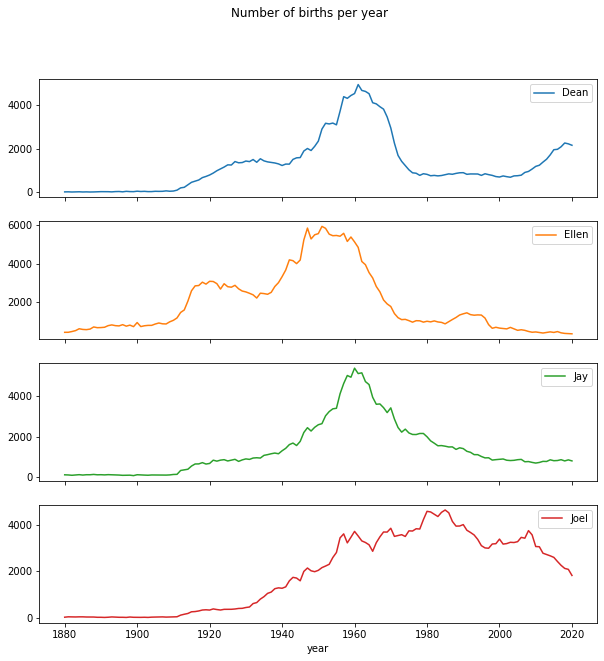

In [55]:
subset.plot(subplots=True, figsize=(10,10), grid=False, title="Number of births per year");

## Measuring Name Diversity

In [56]:
tab = top1000.pivot_table('prop', index='year', columns='gender', aggfunc=sum)

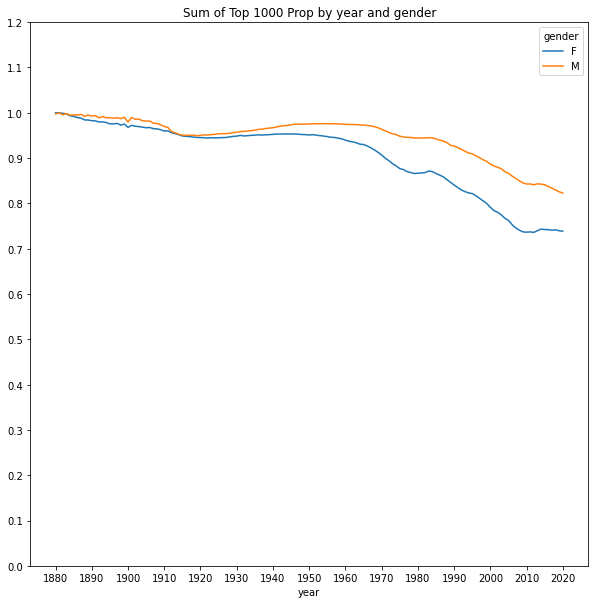

In [58]:
tab.plot(title="Sum of Top 1000 Prop by year and gender", yticks=np.linspace(0,1.2,13), xticks=range(1880, 2030, 10), figsize=(10,10));

In [61]:
dfb = male[male['year'] == 2020]

In [62]:
dfb.head()

,name,gender,births,year,prop
280876,Liam,M,19659,2020,0.011521
280877,Noah,M,18252,2020,0.010696
280878,Oliver,M,14147,2020,0.008290
280879,Elijah,M,13034,2020,0.007638
280880,William,M,12541,2020,0.007349


In [63]:
prop_cumsum = dfb.sort_values(by='prop', ascending=False)['prop'].cumsum()

In [64]:
prop_cumsum[:10]

280876    0.011521
280877    0.022217
280878    0.030507
280879    0.038145
280880    0.045495
280881    0.052673
280882    0.059785
280883    0.066396
280884    0.072670
280885    0.078618
Name: prop, dtype: float64

In [67]:
prop_cumsum.values.searchsorted(0.5) + 1

163

In [68]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group['prop'].cumsum().values.searchsorted(q) + 1

In [69]:
diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)

In [70]:
diversity = diversity.unstack('gender')

In [71]:
diversity.head()

gender,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


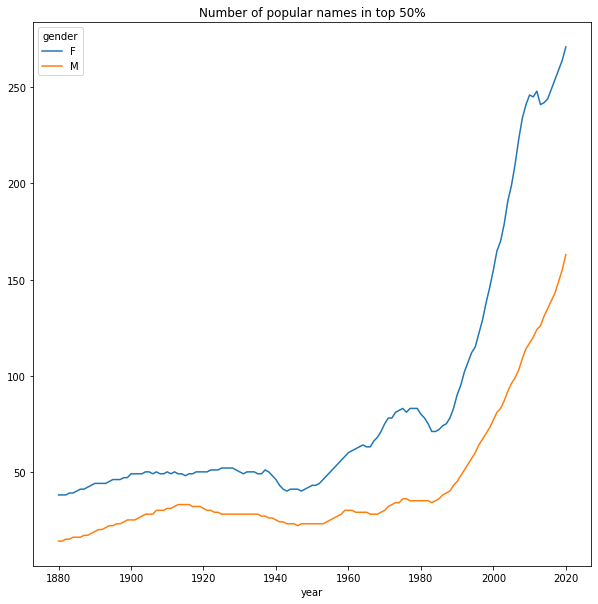

In [73]:
diversity.plot(title="Number of popular names in top 50%", figsize=(10,10));